In [2]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
df=pd.read_csv('fvc.csv')
df.head(6)

,ACCIDENT_NO,VEHICLE_ID,VEHICLE_YEAR_MANUF,VEHICLE_DCA_CODE,INITIAL_DIRECTION,ROAD_SURFACE_TYPE,ROAD_SURFACE_TYPE_DESC,REG_STATE,VEHICLE_BODY_STYLE,VEHICLE_MAKE,...,TRAILER_TYPE,VEHICLE_COLOUR_1,VEHICLE_COLOUR_2,CAUGHT_FIRE,INITIAL_IMPACT,LAMPS,LEVEL_OF_DAMAGE,TOWED_AWAY_FLAG,TRAFFIC_CONTROL,TRAFFIC_CONTROL_DESC
0,T20120000009,A,1996.0,1.0,E,1.0,Paved,V,SEDAN,HOLDEN,...,H,WHI,ZZ,2.0,1,1.0,5,1.0,0.0,No control
1,T20120000012,A,2002.0,1.0,W,1.0,Paved,V,SEDAN,HOLDEN,...,H,BLU,ZZ,2.0,1,1.0,2,2.0,1.0,Stop-go lights
2,T20120000012,B,1988.0,2.0,S,1.0,Paved,V,SEDAN,TOYOTA,...,H,WHI,ZZ,2.0,5,9.0,4,1.0,1.0,Stop-go lights
3,T20120000013,A,1997.0,1.0,N,1.0,Paved,V,SEDAN,MITSUB,...,H,GLD,ZZ,2.0,5,1.0,4,1.0,0.0,No control
4,T20120000013,B,2010.0,2.0,N,1.0,Paved,V,WAGON,TOYOTA,...,H,BLK,ZZ,2.0,4,2.0,4,2.0,0.0,No control
5,T20120000021,A,1998.0,1.0,NE,1.0,Paved,V,SEDAN,TOYOTA,...,H,GLD,ZZ,2.0,F,2.0,3,1.0,0.0,No control


In [4]:
df_group = df.groupby(['VEHICLE_YEAR_MANUF','VEHICLE_BODY_STYLE','VEHICLE_MAKE']).agg({
    'NO_OF_WHEELS':'mean',
    'NO_OF_CYLINDERS':'mean',
    'SEATING_CAPACITY':'mean',
    'TARE_WEIGHT':'mean',
    'TOTAL_NO_OCCUPANTS':'mean'}).reset_index()
df_group

,VEHICLE_YEAR_MANUF,VEHICLE_BODY_STYLE,VEHICLE_MAKE,NO_OF_WHEELS,NO_OF_CYLINDERS,SEATING_CAPACITY,TARE_WEIGHT,TOTAL_NO_OCCUPANTS
0,1961.0,SEDAN,CHEV,4.0,8.0,6.0,1650.0,1.00
1,1962.0,SEDAN,CHRYS,4.0,6.0,5.5,1225.0,1.50
2,1962.0,SEDAN,HOLDEN,4.0,6.0,6.0,1125.0,1.50
3,1962.0,UTIL,HOLDEN,4.0,6.0,2.0,1050.0,1.00
4,1963.0,COUPE,FORD,4.0,8.0,4.0,1600.0,1.00
...,...,...,...,...,...,...,...,...
10656,2024.0,WAGON,MERC B,4.0,4.0,5.0,1980.0,1.00
10657,2024.0,WAGON,MITSUB,4.0,4.0,5.5,1492.5,0.75
10658,2024.0,WAGON,NISSAN,4.0,4.0,5.0,1572.0,2.00
10659,2024.0,WAGON,SUBARU,4.0,4.0,5.0,1555.8,1.60


In [5]:
#df_group = df_group.sort_values(by='VEHICLE_MAKE',ascending=True)
df_group

,VEHICLE_YEAR_MANUF,VEHICLE_BODY_STYLE,VEHICLE_MAKE,NO_OF_WHEELS,NO_OF_CYLINDERS,SEATING_CAPACITY,TARE_WEIGHT,TOTAL_NO_OCCUPANTS
0,1961.0,SEDAN,CHEV,4.0,8.0,6.0,1650.0,1.00
1,1962.0,SEDAN,CHRYS,4.0,6.0,5.5,1225.0,1.50
2,1962.0,SEDAN,HOLDEN,4.0,6.0,6.0,1125.0,1.50
3,1962.0,UTIL,HOLDEN,4.0,6.0,2.0,1050.0,1.00
4,1963.0,COUPE,FORD,4.0,8.0,4.0,1600.0,1.00
...,...,...,...,...,...,...,...,...
10656,2024.0,WAGON,MERC B,4.0,4.0,5.0,1980.0,1.00
10657,2024.0,WAGON,MITSUB,4.0,4.0,5.5,1492.5,0.75
10658,2024.0,WAGON,NISSAN,4.0,4.0,5.0,1572.0,2.00
10659,2024.0,WAGON,SUBARU,4.0,4.0,5.0,1555.8,1.60


In [7]:
features = ['NO_OF_WHEELS','NO_OF_CYLINDERS','SEATING_CAPACITY','TARE_WEIGHT','TOTAL_NO_OCCUPANTS']

scaling = MinMaxScaler()

#Normalized to within 0 and 1, making weighting of features equal
df_group[features] = scaling.fit_transform(df_group[features])
df_group

,VEHICLE_YEAR_MANUF,VEHICLE_BODY_STYLE,VEHICLE_MAKE,NO_OF_WHEELS,NO_OF_CYLINDERS,SEATING_CAPACITY,TARE_WEIGHT,TOTAL_NO_OCCUPANTS
0,1961.0,SEDAN,CHEV,0.2,0.155556,0.079365,0.027500,0.020408
1,1962.0,SEDAN,CHRYS,0.2,0.111111,0.071429,0.020417,0.030612
2,1962.0,SEDAN,HOLDEN,0.2,0.111111,0.079365,0.018750,0.030612
3,1962.0,UTIL,HOLDEN,0.2,0.111111,0.015873,0.017500,0.020408
4,1963.0,COUPE,FORD,0.2,0.155556,0.047619,0.026667,0.020408
...,...,...,...,...,...,...,...,...
10656,2024.0,WAGON,MERC B,0.2,0.066667,0.063492,0.033000,0.020408
10657,2024.0,WAGON,MITSUB,0.2,0.066667,0.071429,0.024875,0.015306
10658,2024.0,WAGON,NISSAN,0.2,0.066667,0.063492,0.026200,0.040816
10659,2024.0,WAGON,SUBARU,0.2,0.066667,0.063492,0.025930,0.032653


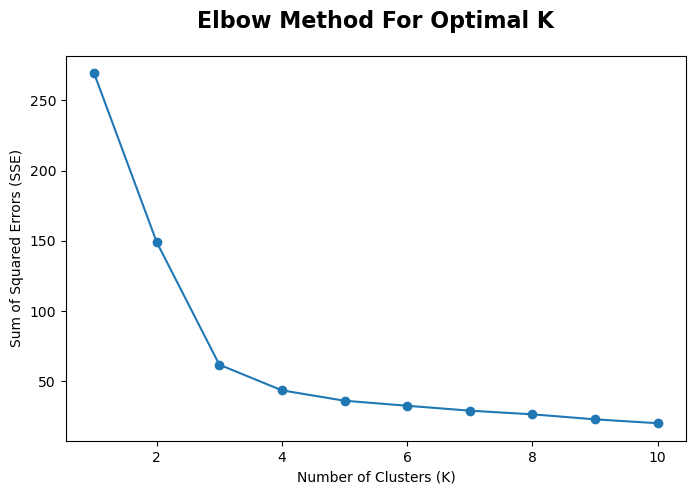

In [13]:
sse=[]

for k in range(1,11):
    kmeans=KMeans(n_clusters=k,random_state=10,n_init=10)
    kmeans.fit(df_group[features])
    sse.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(range(1,11),sse,marker='o',linestyle='-')

plt.xlabel("Number of Clusters (K)")
plt.ylabel("Sum of Squared Errors (SSE)")
plt.title("Elbow Method For Optimal K", fontsize=16, fontweight='bold', pad=20)

plt.savefig('task3_2_elbow.png', format='png', dpi=300)